In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('student-mat.csv', sep= ';')

In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
backUp = df

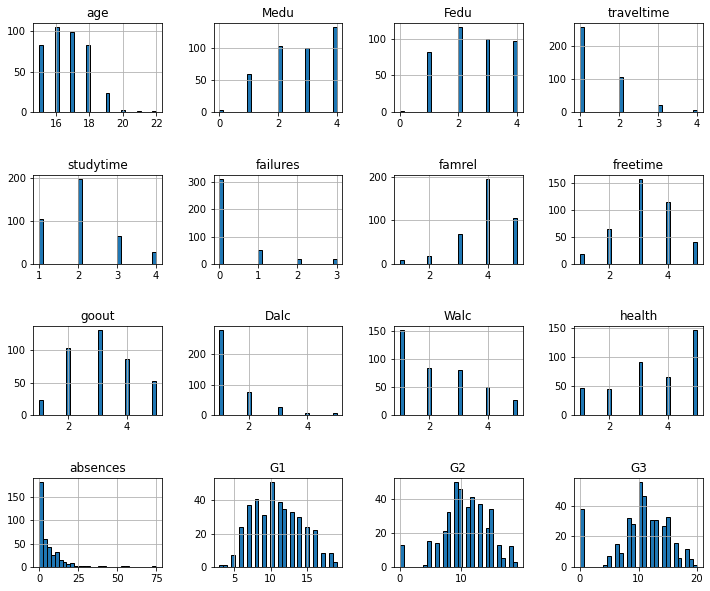

In [5]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace= 0.7, wspace=0.4)

In [8]:
df.T


,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,...,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS
sex,F,F,F,F,F,M,M,F,M,M,...,F,F,F,F,F,M,M,M,M,M
age,18,17,15,15,16,16,16,17,15,15,...,18,18,19,18,18,20,17,21,18,19
address,U,U,U,U,U,U,U,U,U,U,...,R,R,R,U,U,U,U,R,R,U
famsize,GT3,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,GT3,...,GT3,GT3,GT3,LE3,GT3,LE3,LE3,GT3,LE3,LE3
Pstatus,A,T,T,T,T,T,T,A,A,T,...,T,T,T,T,T,A,T,T,T,T
Medu,4,1,1,4,3,4,2,4,3,3,...,2,4,2,3,1,2,3,1,3,1
Fedu,4,1,1,2,3,3,2,4,2,4,...,2,4,3,1,1,2,1,1,2,1
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other,...,at_home,teacher,services,teacher,other,services,services,other,services,other
Fjob,teacher,other,other,services,other,other,other,teacher,other,other,...,other,at_home,other,services,other,services,services,other,other,at_home


In [9]:
string = list(df.dtypes[df.dtypes == 'object'].index)
string

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [10]:
for col in string:
    df[col]= df[col].str.lower().str.replace(" ", "_")

In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [14]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
dtype: int64

we are modifying the data first. For better analyzing.

In [32]:
df['results'] = df.g3 >= 10


In [33]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3', 'results'],
      dtype='object')

In [34]:
df.results = (df.results== True).astype(int)

In [35]:
df.results.mean()

0.6708860759493671

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=32)

In [38]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=31)

In [40]:
y_train = df_train.results.values
y_val = df_val.results.values
y_test = df_test.results.values

In [41]:
del df_train['results']
del df_test['results']
del df_val['results']

In [42]:
df_train_full.results.value_counts()

1    215
0    101
Name: results, dtype: int64

In [45]:
global_mean = df_train_full.results.mean()
round(global_mean,3)

0.68

In [135]:
categorical = list(df.columns[df.dtypes == object])


In [136]:
numerical = df.columns[df.dtypes != object]

In [137]:
df_train_full[categorical].nunique()

school        2
sex           2
address       2
famsize       2
pstatus       2
mjob          5
fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [138]:
df_train_full[numerical].nunique()

age            8
medu           5
fedu           5
traveltime     4
studytime      4
failures       4
famrel         5
freetime       5
goout          5
dalc           5
walc           5
health         5
absences      31
g1            16
g2            17
g3            17
results        2
dtype: int64

In [139]:
female_mean = df_train_full[df_train_full.sex == 'f'].results.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.sex == 'm'].results.mean()
print('gender == male:', round(male_mean, 3))

gender == female: 0.656
gender == male: 0.706


In [140]:
female_mean/global_mean

0.9648166642887717

In [141]:
male_mean/global_mean

1.0374829001367991

In [142]:
Gabriel_pareira = df_train_full[df_train_full.school == 'gp'].results.mean()
print('Gabriel Pareira:', round(Gabriel_pareira, 3))

Mousinho_da_Silveria = df_train_full[df_train_full.school == 'ms'].results.mean()
print('Mousinho da Silveria:', round(Mousinho_da_Silveria, 3))

Gabriel Pareira: 0.691
Mousinho da Silveria: 0.605


In [143]:
from IPython.display import display

In [144]:
global_mean = df_train_full.results.mean()
global_mean

0.680379746835443

In [145]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).results.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['effect'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,effect
school,,,
gp,0.690647,0.010268,1.015091
ms,0.605263,-0.075117,0.889596


,mean,diff,effect
sex,,,
f,0.656442,-0.023938,0.964817
m,0.705882,0.025503,1.037483


,mean,diff,effect
address,,,
r,0.579710,-0.100670,0.852039
u,0.708502,0.028122,1.041333


,mean,diff,effect
famsize,,,
gt3,0.669643,-0.010737,0.984219
le3,0.706522,0.026142,1.038423


,mean,diff,effect
pstatus,,,
a,0.774194,0.093814,1.137884
t,0.670175,-0.010204,0.985002


,mean,diff,effect
mjob,,,
at_home,0.577778,-0.102602,0.849199
health,0.846154,0.165774,1.243649
other,0.654545,-0.025834,0.962030
services,0.690476,0.010096,1.014839
teacher,0.725490,0.045110,1.066302


,mean,diff,effect
fjob,,,
at_home,0.562500,-0.117880,0.826744
health,0.714286,0.033906,1.049834
other,0.710059,0.029679,1.043622
services,0.627660,-0.052720,0.922514
teacher,0.739130,0.058751,1.086350


,mean,diff,effect
reason,,,
course,0.643478,-0.036901,0.945763
home,0.684783,0.004403,1.006471
other,0.700000,0.019620,1.028837
reputation,0.721519,0.041139,1.060465


,mean,diff,effect
guardian,,,
father,0.753425,0.073045,1.107359
mother,0.665158,-0.015221,0.977628
other,0.590909,-0.089471,0.868499


,mean,diff,effect
schoolsup,,,
no,0.701818,0.021438,1.031510
yes,0.536585,-0.143794,0.788656


,mean,diff,effect
famsup,,,
no,0.705426,0.025047,1.036813
yes,0.663102,-0.017278,0.974605


,mean,diff,effect
paid,,,
no,0.645349,-0.035031,0.948513
yes,0.722222,0.041842,1.061499


,mean,diff,effect
activities,,,
no,0.680982,0.000602,1.000885
yes,0.679739,-0.000641,0.999058


,mean,diff,effect
nursery,,,
no,0.666667,-0.013713,0.979845
yes,0.683594,0.003214,1.004724


,mean,diff,effect
higher,,,
no,0.375000,-0.305380,0.551163
yes,0.696667,0.016287,1.023938


,mean,diff,effect
internet,,,
no,0.600000,-0.080380,0.881860
yes,0.695489,0.015109,1.022207


,mean,diff,effect
romantic,,,
no,0.708134,0.027754,1.040792
yes,0.626168,-0.054212,0.920322


In [146]:
from sklearn.metrics import mutual_info_score

In [147]:
numerNew=list(numerical)
numerNew.remove('g3')
numerNew.remove('results')

In [148]:
numerNew


['age',
 'medu',
 'fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'dalc',
 'walc',
 'health',
 'absences',
 'g1',
 'g2']

In [149]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.results)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi)

,MI
mjob,1.058062e-02
higher,1.049529e-02
schoolsup,6.737797e-03
address,6.304388e-03
fjob,5.207940e-03
guardian,4.568189e-03
romantic,3.417573e-03
paid,3.389291e-03
internet,2.708224e-03
pstatus,2.328382e-03


In [150]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.results)

df_mi = df_train_full[numerical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi)

,MI
results,0.626583
g3,0.626583
g2,0.443880
g1,0.338893
absences,0.079055
failures,0.051169
goout,0.028018
age,0.020171
medu,0.018975
fedu,0.017269


In [151]:
df_train_full[numerNew].corrwith(df_train_full.results).to_frame('correlation')

,correlation
age,-0.152963
medu,0.159858
fedu,0.151185
traveltime,-0.050082
studytime,0.077899
failures,-0.313612
famrel,0.024284
freetime,-0.014141
goout,-0.199849
dalc,-0.080800


In [152]:
df_train_full.groupby(by='results')[numerical].mean()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3,results
results,,,,,,,,,,,,,,,,,
0,16.960396,2.485149,2.267327,1.485149,1.920792,0.663366,3.940594,3.277228,3.415842,1.594059,2.386139,3.663366,6.158416,7.693069,6.693069,5.217822,0.0
1,16.534884,2.865116,2.618605,1.409302,2.060465,0.162791,3.986047,3.246512,2.939535,1.437209,2.274419,3.446512,5.325581,12.530233,12.627907,12.883721,1.0


In [153]:
from sklearn.feature_extraction import DictVectorizer

In [154]:
df_train[numerNew]

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2
281,17,3,2,1,1,1,4,4,4,3,4,3,19,11,9
262,18,3,2,1,3,0,5,3,2,1,1,3,1,13,12
307,19,4,4,2,1,1,4,3,4,1,1,4,38,8,9
161,15,3,2,2,2,2,4,4,4,1,4,3,6,5,9
110,15,4,4,1,1,0,5,5,3,1,1,4,6,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,17,4,4,1,3,0,5,4,4,1,3,4,7,10,9
116,15,4,4,2,2,0,4,4,3,1,1,2,2,11,13
230,17,4,3,1,2,0,3,2,3,1,2,3,14,13,13
344,18,2,3,1,3,0,4,3,3,1,2,3,4,11,10


In [156]:
train_dict = df_train[categorical + numerNew ].to_dict(orient='records')

In [157]:
train_dict[0]

{'school': 'gp',
 'sex': 'm',
 'address': 'u',
 'famsize': 'le3',
 'pstatus': 'a',
 'mjob': 'teacher',
 'fjob': 'services',
 'reason': 'home',
 'guardian': 'mother',
 'schoolsup': 'no',
 'famsup': 'no',
 'paid': 'no',
 'activities': 'no',
 'nursery': 'yes',
 'higher': 'yes',
 'internet': 'yes',
 'romantic': 'no',
 'age': 17,
 'medu': 3,
 'fedu': 2,
 'traveltime': 1,
 'studytime': 1,
 'failures': 1,
 'famrel': 4,
 'freetime': 4,
 'goout': 4,
 'dalc': 3,
 'walc': 4,
 'health': 3,
 'absences': 19,
 'g1': 11,
 'g2': 9}

In [158]:
dv = DictVectorizer(sparse =False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [159]:
X_train = dv.transform(train_dict)

In [160]:
X_train.shape

(211, 58)

In [162]:
dv.get_feature_names()

['absences',
 'activities=no',
 'activities=yes',
 'address=r',
 'address=u',
 'age',
 'dalc',
 'failures',
 'famrel',
 'famsize=gt3',
 'famsize=le3',
 'famsup=no',
 'famsup=yes',
 'fedu',
 'fjob=at_home',
 'fjob=health',
 'fjob=other',
 'fjob=services',
 'fjob=teacher',
 'freetime',
 'g1',
 'g2',
 'goout',
 'guardian=father',
 'guardian=mother',
 'guardian=other',
 'health',
 'higher=no',
 'higher=yes',
 'internet=no',
 'internet=yes',
 'medu',
 'mjob=at_home',
 'mjob=health',
 'mjob=other',
 'mjob=services',
 'mjob=teacher',
 'nursery=no',
 'nursery=yes',
 'paid=no',
 'paid=yes',
 'pstatus=a',
 'pstatus=t',
 'reason=course',
 'reason=home',
 'reason=other',
 'reason=reputation',
 'romantic=no',
 'romantic=yes',
 'school=gp',
 'school=ms',
 'schoolsup=no',
 'schoolsup=yes',
 'sex=f',
 'sex=m',
 'studytime',
 'traveltime',
 'walc']

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [166]:
val_dict = df_val[categorical + numerNew].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [167]:
model.predict_proba(X_val)

array([[2.39035213e-01, 7.60964787e-01],
       [9.43041403e-01, 5.69585967e-02],
       [5.12293434e-02, 9.48770657e-01],
       [6.83214476e-05, 9.99931679e-01],
       [2.69290995e-03, 9.97307090e-01],
       [1.11617427e-02, 9.88838257e-01],
       [8.48157687e-01, 1.51842313e-01],
       [9.99975124e-01, 2.48764651e-05],
       [3.52951008e-02, 9.64704899e-01],
       [2.13856191e-08, 9.99999979e-01],
       [3.70560567e-03, 9.96294394e-01],
       [1.32181203e-02, 9.86781880e-01],
       [5.33906697e-10, 9.99999999e-01],
       [9.99999975e-01, 2.49284293e-08],
       [8.90012450e-01, 1.09987550e-01],
       [1.65470896e-02, 9.83452910e-01],
       [4.00508357e-01, 5.99491643e-01],
       [3.88329563e-01, 6.11670437e-01],
       [9.99996592e-01, 3.40849559e-06],
       [9.05810603e-01, 9.41893966e-02],
       [7.35864778e-06, 9.99992641e-01],
       [1.86544947e-03, 9.98134551e-01],
       [9.95043601e-01, 4.95639934e-03],
       [5.13690680e-01, 4.86309320e-01],
       [1.627365

In [168]:
y_pred = model.predict_proba(X_val)[:, 1]

In [169]:
y_pred

array([7.60964787e-01, 5.69585967e-02, 9.48770657e-01, 9.99931679e-01,
       9.97307090e-01, 9.88838257e-01, 1.51842313e-01, 2.48764651e-05,
       9.64704899e-01, 9.99999979e-01, 9.96294394e-01, 9.86781880e-01,
       9.99999999e-01, 2.49284293e-08, 1.09987550e-01, 9.83452910e-01,
       5.99491643e-01, 6.11670437e-01, 3.40849559e-06, 9.41893966e-02,
       9.99992641e-01, 9.98134551e-01, 4.95639934e-03, 4.86309320e-01,
       9.99837263e-01, 9.95210811e-01, 9.99994830e-01, 9.98600301e-01,
       1.00000000e+00, 1.89470153e-02, 9.99970065e-01, 9.99998658e-01,
       5.11082884e-05, 5.52403909e-01, 9.99999850e-01, 9.99999998e-01,
       9.99996883e-01, 9.98698326e-01, 9.99999858e-01, 9.99999981e-01,
       1.44294160e-02, 7.52322986e-01, 9.99345726e-01, 8.96131012e-01,
       9.76618315e-01, 9.82591572e-01, 5.53859450e-02, 2.96112825e-06,
       9.99997294e-01, 9.99995367e-01, 3.50653705e-02, 7.76172061e-06,
       9.63597868e-01, 9.99185893e-01, 2.77703009e-01, 5.08563420e-11,
      

In [189]:
success = y_pred > 0.5

In [190]:
(y_val == success).mean()

0.9047619047619048

In [191]:
model.intercept_[0]

-0.17847254156221776

In [192]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'absences': -0.082,
 'activities=no': 0.353,
 'activities=yes': -0.532,
 'address=r': -0.137,
 'address=u': -0.042,
 'age': -1.062,
 'dalc': 0.07,
 'failures': -0.445,
 'famrel': 0.776,
 'famsize=gt3': 0.296,
 'famsize=le3': -0.475,
 'famsup=no': 0.468,
 'famsup=yes': -0.646,
 'fedu': -0.55,
 'fjob=at_home': -0.382,
 'fjob=health': -0.233,
 'fjob=other': 0.719,
 'fjob=services': -0.581,
 'fjob=teacher': 0.298,
 'freetime': -0.299,
 'g1': 0.714,
 'g2': 1.618,
 'goout': -0.776,
 'guardian=father': -0.307,
 'guardian=mother': 0.225,
 'guardian=other': -0.097,
 'health': -0.468,
 'higher=no': -0.175,
 'higher=yes': -0.003,
 'internet=no': 0.085,
 'internet=yes': -0.264,
 'medu': 0.215,
 'mjob=at_home': -0.396,
 'mjob=health': -0.248,
 'mjob=other': -0.097,
 'mjob=services': 0.254,
 'mjob=teacher': 0.308,
 'nursery=no': 0.221,
 'nursery=yes': -0.399,
 'paid=no': 0.072,
 'paid=yes': -0.25,
 'pstatus=a': 0.283,
 'pstatus=t': -0.461,
 'reason=course': 0.009,
 'reason=home': 0.334,
 'reason=ot

In [193]:
test_dict = df_test[categorical + numerNew].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [195]:
model.predict_proba(X_test)

array([[4.89586438e-01, 5.10413562e-01],
       [3.24366664e-05, 9.99967563e-01],
       [3.22247416e-01, 6.77752584e-01],
       [6.96442156e-04, 9.99303558e-01],
       [8.21890041e-01, 1.78109959e-01],
       [4.28661426e-03, 9.95713386e-01],
       [9.74655014e-01, 2.53449859e-02],
       [3.20052456e-03, 9.96799475e-01],
       [3.60725705e-02, 9.63927430e-01],
       [2.44335513e-06, 9.99997557e-01],
       [3.60876557e-04, 9.99639123e-01],
       [8.52178661e-06, 9.99991478e-01],
       [9.99468375e-01, 5.31625479e-04],
       [1.36837724e-07, 9.99999863e-01],
       [6.37688325e-02, 9.36231168e-01],
       [9.77039199e-01, 2.29608011e-02],
       [9.99251638e-01, 7.48361736e-04],
       [3.37844053e-08, 9.99999966e-01],
       [1.32650853e-01, 8.67349147e-01],
       [3.23964089e-05, 9.99967604e-01],
       [2.40315397e-01, 7.59684603e-01],
       [4.64141747e-03, 9.95358583e-01],
       [6.50298457e-08, 9.99999935e-01],
       [1.37560393e-03, 9.98624396e-01],
       [9.997700

In [196]:
y_pred = model.predict_proba(X_test)[:,1]


In [197]:
success = y_pred > 0.5

In [198]:
(y_test == success).mean()

0.8987341772151899